In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# import sklearn models
from sklearn.linear_model import LogisticRegression # 1
from sklearn.neighbors import KNeighborsClassifier # 2
from sklearn.ensemble import RandomForestClassifier # 3
from xgboost import XGBClassifier # 4


In [48]:
df = pd.read_csv("C:\\Users\\Checkout\\Desktop\\Machine Learning\\Machine Learning Project\\Dataset\\Spotify_with_clusters.csv")
df

,Index,Song Name,Artist,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Release Year,Duration (minutes),Cluster_Labels
0,1,Demons,Imagine Dragons,Rock,91,41,70,90,2,20,30,89.938,42,2012,2.96,2
1,2,What Makes You Beautiful,One Direction,Pop,92,70,79,93,10,1,5,124.990,92,2012,3.33,3
2,3,Wild Ones (feat. Sia),Flo Rida,Hip Hop,87,55,87,78,6,10,29,127.075,43,2012,3.88,2
3,4,Silhouettes - Original Radio Edit,Avicii,Electronic,60,54,80,74,6,16,12,128.074,86,2012,3.53,3
4,5,The One That Got Away,Katy Perry,Pop,81,65,79,85,2,0,21,133.962,89,2012,3.79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Ramen & OJ,Joyner Lucas,Hip Hop,73,54,56,71,31,50,8,106.196,14,2021,3.64,1
1996,1997,Headshot (feat. Polo G & Fivio Foreign),Lil Tjay,Hip Hop,73,79,64,67,30,8,14,118.000,38,2021,2.41,0
1997,1998,10 Years,Daði Freyr,Pop,58,78,62,68,2,1,8,123.038,43,2021,2.77,0
1998,1999,a p p l y i n g . p r e s s u r e,J. Cole,Hip Hop,59,66,77,74,33,8,31,83.092,39,2021,2.96,0


In [49]:
genre_cluster_matrix = pd.crosstab(df['Genre'], df['Cluster_Labels'])
print(genre_cluster_matrix)

Cluster_Labels    0    1    2    3   4
Genre                                 
Dance             3    1    7    3   2
Electronic       21   25   34   43  11
Folk              1    3    4    4   1
Funk/Soul         6    4    1    6   0
Hip Hop         376   62  175  165  79
Latin            40   10   22  109   8
Pop              79  120  217  204  57
R&B               0    0    2    1   0
Rock             16   14   24   33   7


In [50]:
selected_columns = ['Index', 'Song Name', 'Artist', 'Genre']
noun_df = df[selected_columns].copy()
noun_df

,Index,Song Name,Artist,Genre
0,1,Demons,Imagine Dragons,Rock
1,2,What Makes You Beautiful,One Direction,Pop
2,3,Wild Ones (feat. Sia),Flo Rida,Hip Hop
3,4,Silhouettes - Original Radio Edit,Avicii,Electronic
4,5,The One That Got Away,Katy Perry,Pop
...,...,...,...,...
1995,1996,Ramen & OJ,Joyner Lucas,Hip Hop
1996,1997,Headshot (feat. Polo G & Fivio Foreign),Lil Tjay,Hip Hop
1997,1998,10 Years,Daði Freyr,Pop
1998,1999,a p p l y i n g . p r e s s u r e,J. Cole,Hip Hop


In [51]:
cluster_df = df.drop(columns=selected_columns).copy()
cluster_df

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Release Year,Duration (minutes),Cluster_Labels
0,91,41,70,90,2,20,30,89.938,42,2012,2.96,2
1,92,70,79,93,10,1,5,124.990,92,2012,3.33,3
2,87,55,87,78,6,10,29,127.075,43,2012,3.88,2
3,60,54,80,74,6,16,12,128.074,86,2012,3.53,3
4,81,65,79,85,2,0,21,133.962,89,2012,3.79,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,73,54,56,71,31,50,8,106.196,14,2021,3.64,1
1996,73,79,64,67,30,8,14,118.000,38,2021,2.41,0
1997,58,78,62,68,2,1,8,123.038,43,2021,2.77,0
1998,59,66,77,74,33,8,31,83.092,39,2021,2.96,0


In [52]:
df= cluster_df
df

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Release Year,Duration (minutes),Cluster_Labels
0,91,41,70,90,2,20,30,89.938,42,2012,2.96,2
1,92,70,79,93,10,1,5,124.990,92,2012,3.33,3
2,87,55,87,78,6,10,29,127.075,43,2012,3.88,2
3,60,54,80,74,6,16,12,128.074,86,2012,3.53,3
4,81,65,79,85,2,0,21,133.962,89,2012,3.79,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,73,54,56,71,31,50,8,106.196,14,2021,3.64,1
1996,73,79,64,67,30,8,14,118.000,38,2021,2.41,0
1997,58,78,62,68,2,1,8,123.038,43,2021,2.77,0
1998,59,66,77,74,33,8,31,83.092,39,2021,2.96,0


In [53]:
df['Cluster_Labels'].value_counts()

3    568
0    542
2    486
1    239
4    165
Name: Cluster_Labels, dtype: int64

In [54]:
# define feature variable
X = df.drop("Cluster_Labels", axis=1)
X.sample(5)

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Release Year,Duration (minutes)
559,87,10,41,72,3,11,10,180.042,6,2017,3.98
1285,66,88,72,77,8,6,7,92.028,62,2020,3.37
73,83,21,53,70,1,44,11,75.881,4,2012,4.77
1484,61,67,83,74,7,12,14,92.041,16,2020,2.65
1104,35,41,38,57,5,84,11,149.367,92,2020,2.63


In [55]:
y = np.array(df["Cluster_Labels"])
y

array([2, 3, 2, ..., 0, 0, 2], dtype=int64)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Logistic Regression

In [62]:
pipeline_lr = Pipeline(
    [
        ("scalar1", StandardScaler()),
        ("lr_clf", LogisticRegression(solver='saga',random_state=0,multi_class='multinomial',max_iter=1000,tol=10e-3)),
    ]
)

In [63]:
pipeline_lr.fit(X_train, y_train)
y_test_pred_lr = pipeline_lr.predict(X_test)
print('Actual label:    ', y_test[:20])
print('Predicted label: ', y_test_pred_lr[:20])

Actual label:     [2 2 0 0 3 3 1 4 0 3 2 2 2 2 3 0 2 3 0 2]
Predicted label:  [2 2 0 0 3 3 1 4 0 3 2 2 2 2 3 0 2 3 0 2]


In [64]:
# module for classification report
from sklearn.metrics import classification_report
# print out classification report
target_names = ['cluster 0', 'cluster 1', 'cluster 2','cluster 3', 'cluster 4']
print(classification_report(y_test, y_test_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

   cluster 0       0.97      0.99      0.98       103
   cluster 1       0.98      0.96      0.97        46
   cluster 2       0.93      0.98      0.96       102
   cluster 3       0.98      0.94      0.96       116
   cluster 4       0.97      0.94      0.95        33

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



In [65]:
report_1 = classification_report(y_test, y_test_pred_lr, target_names=target_names,output_dict=True)
df_r_logistic = pd.DataFrame(report_1).transpose()
df_r_logistic.head()

,precision,recall,f1-score,support
cluster 0,0.971429,0.990291,0.980769,103.0
cluster 1,0.977778,0.956522,0.967033,46.0
cluster 2,0.934579,0.980392,0.956938,102.0
cluster 3,0.981982,0.939655,0.960352,116.0
cluster 4,0.968750,0.939394,0.953846,33.0


In [15]:
df_r_logistic.to_latex("~/Downloads/logistic.tex")

C:\Users\Checkout\AppData\Local\Temp\ipykernel_20104\1232306379.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_r_logistic.to_latex("~/Downloads/logistic.tex")


<Figure size 2000x1200 with 0 Axes>

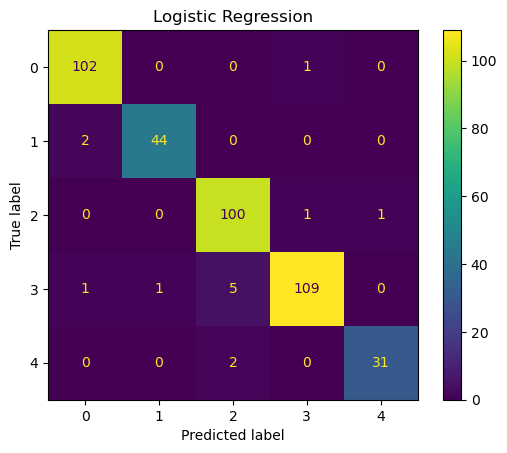

In [66]:
cm = confusion_matrix(y_test, y_test_pred_lr)

# plot confusion matrix of logistic regression
plt.figure(figsize=(20,12))
cm = confusion_matrix(y_test, y_test_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Logistic Regression")
plt.show()

In [67]:
y_test_proba_lr = pipeline_lr.predict_proba(X_test)

# roc auc score using one versus rest and macro average
LR_auc = roc_auc_score(y_test, y_test_proba_lr, multi_class='ovr', average='macro')
f"The average AUC for the logistic regression model is {LR_auc:0.3f}"

'The average AUC for the logistic regression model is 0.998'

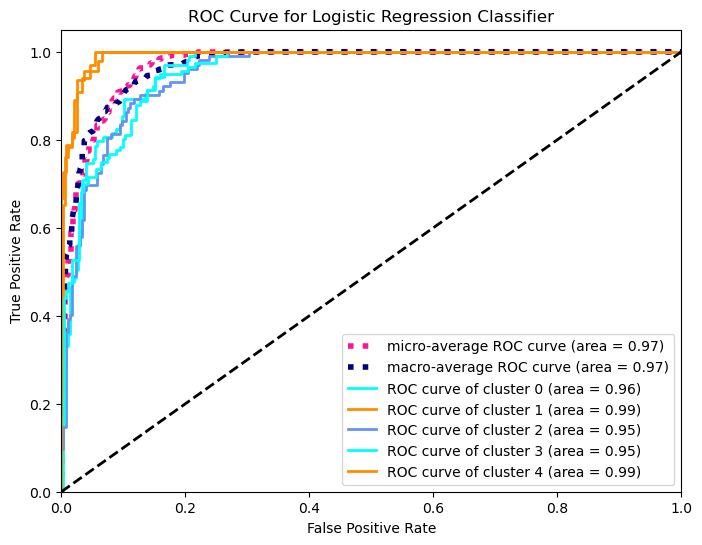

In [68]:
# Plot ROC Curves for Logistic Regression
from sklearn.preprocessing import label_binarize
from itertools import cycle
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

n_classes = 5
lw=2

y_score = pipeline_lr.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plot ROC for a specific class
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of cluster {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Classifier")
plt.legend(loc="lower right")
plt.show()

In [69]:
# f1 score
from sklearn.metrics import f1_score
LR_f1 = f1_score(y_test, y_test_pred_lr, average='macro')
f"The baseline F1(macro) socre of the logistic regression model on the test data is {LR_f1:0.3f}"

'The baseline F1(macro) socre of the logistic regression model on the test data is 0.964'

# Random Forest

In [20]:
# 2. RANDOM FOREST
# instantiate a class for random forest classifier
rf_clf = RandomForestClassifier(random_state=0)

In [70]:
rf_clf.fit(X_train, y_train)
# make prediction on test data
y_test_pred_rf = rf_clf.predict(X_test)
# check first 20 ground truths and prediction
print('Actual label:    ', y_test[:20])
print('Predicted label: ', y_test_pred_rf[:20])

Actual label:     [2 2 0 0 3 3 1 4 0 3 2 2 2 2 3 0 2 3 0 2]
Predicted label:  [2 2 0 0 3 3 1 4 2 3 0 2 2 2 2 0 2 3 0 2]


In [71]:
# print classification report
target_names = ['cluster 0', 'cluster 1', 'cluster 2','cluster 3', 'cluster 4']
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

   cluster 0       0.87      0.90      0.89       103
   cluster 1       0.93      0.85      0.89        46
   cluster 2       0.85      0.90      0.88       102
   cluster 3       0.92      0.91      0.91       116
   cluster 4       0.86      0.76      0.81        33

    accuracy                           0.89       400
   macro avg       0.89      0.86      0.87       400
weighted avg       0.89      0.89      0.88       400



In [72]:
# classification report
report_2 = classification_report(y_test, y_test_pred_rf, target_names=target_names,output_dict=True)
df_r_rf = pd.DataFrame(report_2).transpose()
df_r_rf.head()

,precision,recall,f1-score,support
cluster 0,0.869159,0.902913,0.885714,103.0
cluster 1,0.928571,0.847826,0.886364,46.0
cluster 2,0.851852,0.901961,0.876190,102.0
cluster 3,0.921053,0.905172,0.913043,116.0
cluster 4,0.862069,0.757576,0.806452,33.0


<Figure size 2000x1200 with 0 Axes>

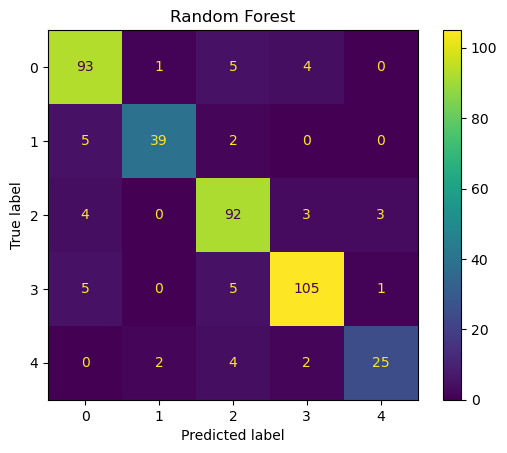

In [73]:
plt.figure(figsize=(20,12))
cm = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest")
plt.show()

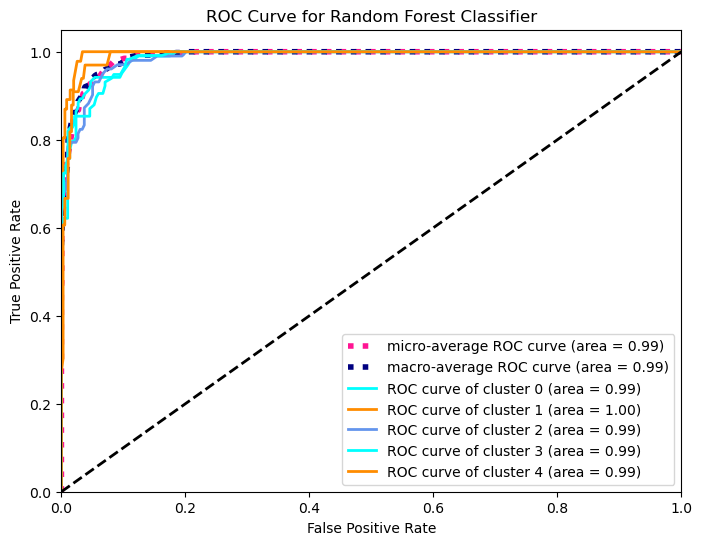

In [74]:
# Plot ROC for Random Forest Classifier
y_score = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plot ROC for a specific class
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of cluster {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()

In [75]:
RF_f1 = f1_score(y_test, y_test_pred_rf, average='macro')
f"The F1(macro) socre of the random forest model on the validation data is {RF_f1:0.3f}"

'The F1(macro) socre of the random forest model on the validation data is 0.874'

Actual label:     [2 2 0 0 3 3 1 4 0 3 2 2 2 2 3 0 2 3 0 2]
Predicted label:  [2 2 0 0 3 3 1 4 2 3 2 2 2 2 3 0 2 3 0 2]
              precision    recall  f1-score   support

   cluster 0       0.94      0.90      0.92       103
   cluster 1       0.95      0.91      0.93        46
   cluster 2       0.84      0.95      0.89       102
   cluster 3       0.94      0.89      0.91       116
   cluster 4       0.87      0.82      0.84        33

    accuracy                           0.91       400
   macro avg       0.91      0.89      0.90       400
weighted avg       0.91      0.91      0.91       400



<Figure size 2000x1200 with 0 Axes>

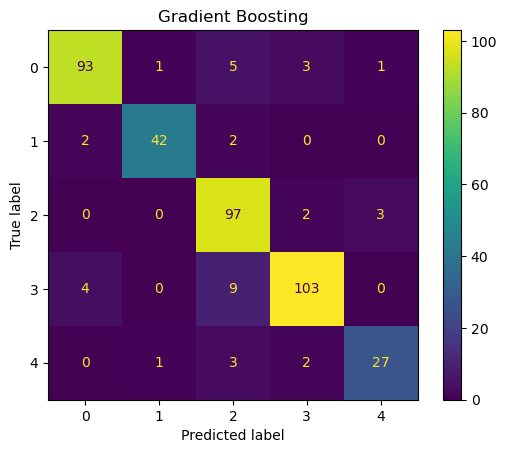

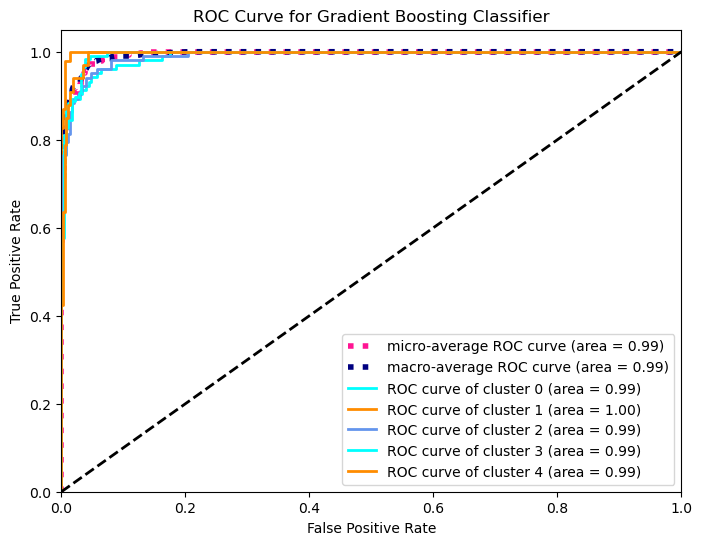

'The F1(macro) score of the gradient boosting model on the testidation data is 0.900'

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
# instantiate a class for gradient boosting classifier
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
# make prediction on test data
y_test_pred_gb = gb_clf.predict(X_test)
# check first 20 ground truths and prediction
print('Actual label:    ', y_test[:20])
print('Predicted label: ', y_test_pred_gb[:20])

# print classification report
target_names = ['cluster 0', 'cluster 1', 'cluster 2','cluster 3', 'cluster 4']
print(classification_report(y_test, y_test_pred_gb, target_names=target_names))

# plot confusion matrix of gradient boosting model
plt.figure(figsize=(20,12))
cm_gb = confusion_matrix(y_test, y_test_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()
plt.title("Gradient Boosting")
plt.show()

# Plot ROC for Gradient Boosting Classifier
y_score_gb = gb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()
for i in range(n_classes):
    fpr_gb[i], tpr_gb[i], _ = roc_curve(y_test_bin[:, i], y_score_gb[:, i])
    roc_auc_gb[i] = auc(fpr_gb[i], tpr_gb[i])

# Compute micro-average ROC curve and ROC area
fpr_gb["micro"], tpr_gb["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_gb.ravel())
roc_auc_gb["micro"] = auc(fpr_gb["micro"], tpr_gb["micro"])

# plot ROC for a specific class
# First aggregate all false positive rates
all_fpr_gb = np.unique(np.concatenate([fpr_gb[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_gb = np.zeros_like(all_fpr_gb)
for i in range(n_classes):
    mean_tpr_gb += np.interp(all_fpr_gb, fpr_gb[i], tpr_gb[i])

# Finally average it and compute AUC
mean_tpr_gb /= n_classes

fpr_gb["macro"] = all_fpr_gb
tpr_gb["macro"] = mean_tpr_gb
roc_auc_gb["macro"] = auc(fpr_gb["macro"], tpr_gb["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr_gb["micro"],
    tpr_gb["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_gb["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_gb["macro"],
    tpr_gb["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_gb["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr_gb[i],
        tpr_gb[i],
        color=color,
        lw=lw,
        label="ROC curve of cluster {0} (area = {1:0.2f})".format(i, roc_auc_gb[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.show()
GB_f1 = f1_score(y_test, y_test_pred_gb, average='macro')
f"The F1(macro) score of the gradient boosting model on the test data is {GB_f1:0.3f}"

# KNN

Actual label:     [2 2 0 0 3 3 1 4 0 3 2 2 2 2 3 0 2 3 0 2]
Predicted label:  [2 2 0 0 3 3 1 0 0 3 2 2 2 2 2 0 2 3 0 2]
              precision    recall  f1-score   support

   cluster 0       0.77      0.83      0.80       103
   cluster 1       0.93      0.83      0.87        46
   cluster 2       0.78      0.91      0.84       102
   cluster 3       0.85      0.79      0.82       116
   cluster 4       0.95      0.58      0.72        33

    accuracy                           0.82       400
   macro avg       0.86      0.79      0.81       400
weighted avg       0.83      0.82      0.82       400



<Figure size 2000x1200 with 0 Axes>

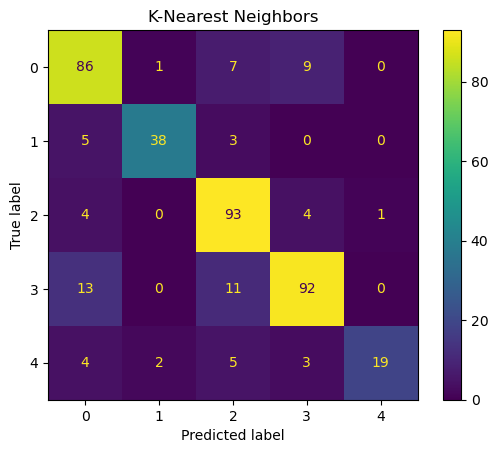

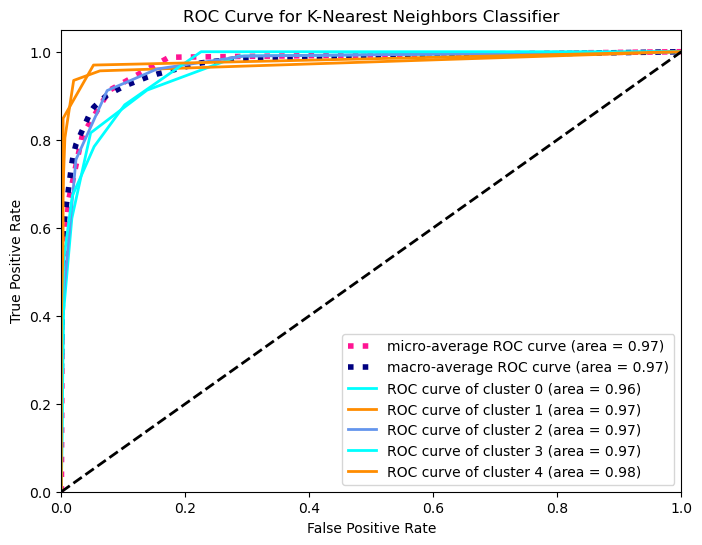

'The F1(macro) score of the K-Nearest Neighbors model on the test data is 0.811'

In [98]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate a class for KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# make prediction on test data
y_test_pred_knn = knn_clf.predict(X_test)

# check first 20 ground truths and predictions
print('Actual label:    ', y_test[:20])
print('Predicted label: ', y_test_pred_knn[:20])

# print classification report
target_names = ['cluster 0', 'cluster 1', 'cluster 2','cluster 3', 'cluster 4']
print(classification_report(y_test, y_test_pred_knn, target_names=target_names))

# plot confusion matrix of KNN model
plt.figure(figsize=(20,12))
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("K-Nearest Neighbors")
plt.show()

# Plot ROC for KNN Classifier
y_score_knn = knn_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Compute micro-average ROC curve and ROC area
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_knn.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# plot ROC for a specific class
# First aggregate all false positive rates
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += np.interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])

# Finally average it and compute AUC
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(
    fpr_knn["micro"],
    tpr_knn["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_knn["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_knn["macro"],
    tpr_knn["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_knn["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr_knn[i],
        tpr_knn[i],
        color=color,
        lw=lw,
        label="ROC curve of cluster {0} (area = {1:0.2f})".format(i, roc_auc_knn[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for K-Nearest Neighbors Classifier")
plt.legend(loc="lower right")
plt.show()

KNN_f1 = f1_score(y_test, y_test_pred_knn, average='macro')
f"The F1(macro) score of the K-Nearest Neighbors model on the test data is {KNN_f1:0.3f}"


In [77]:
from sklearn import metrics

In [99]:
acLR = round(metrics.accuracy_score(y_test, y_test_pred_lr),2)

acRF = round(metrics.accuracy_score(y_test, y_test_pred_rf),2)

acGB = round(metrics.accuracy_score(y_test, y_test_pred_gb),2)

acKNN = round(metrics.accuracy_score(y_test, y_test_pred_knn),2)

acScore = [acLR, acRF, acGB, acKNN]

In [100]:
prLR = round(metrics.precision_score(y_test, y_test_pred_lr,average='weighted'), 2)
prRF = round(metrics.precision_score(y_test, y_test_pred_rf, average='weighted'), 2)
prGB = round(metrics.precision_score(y_test, y_test_pred_gb, average='weighted'), 2)
prKNN = round(metrics.precision_score(y_test, y_test_pred_knn, average='weighted'), 2)

prScore = [prLR, prRF, prGB, prKNN]

In [101]:
f1LR = round(metrics.f1_score(y_test, y_test_pred_lr,average='weighted'), 2)
f1RF = round(metrics.f1_score(y_test, y_test_pred_rf,average='weighted'), 2)
f1GB = round(metrics.f1_score(y_test, y_test_pred_gb,average='weighted'), 2)
f1KNN = round(metrics.f1_score(y_test, y_test_pred_knn,average='weighted'), 2)

f1Score = [f1LR, f1RF, f1GB, f1KNN]

In [102]:
df = pd.DataFrame(
    list(zip(
        ['LR', 'RF', 'GB', 'KNN'],acScore , prScore, f1Score)),
    columns = ['Model', 'Accuracy','Precision','F1-Score']
)

df = pd.DataFrame.from_dict(df)

print(df)

  Model  Accuracy  Precision  F1-Score
0    LR      0.96       0.97      0.96
1    RF      0.88       0.89      0.88
2    GB      0.90       0.91      0.91
3   KNN      0.82       0.83      0.82


In [103]:
from sklearn.metrics import jaccard_score

In [104]:
jcLR = round(jaccard_score(y_test, y_test_pred_lr,average='weighted'),2)

jcRF = round(jaccard_score(y_test, y_test_pred_rf,average='weighted'),2)

jcGB = round(jaccard_score(y_test, y_test_pred_gb,average='weighted'),2)

jcKNN = round(jaccard_score(y_test, y_test_pred_knn,average='weighted'),2)

list_jaccard_similarity  = [jcLR, jcRF, jcGB, jcKNN]

In [105]:
df = pd.DataFrame(
    list(zip(
        ['LR', 'RF', 'GB', 'KNN'],list_jaccard_similarity)),
    columns = ['Model', 'Jaccard']
)

df = pd.DataFrame.from_dict(df)

print(df)

  Model  Jaccard
0    LR     0.93
1    RF     0.79
2    GB     0.83
3   KNN     0.69


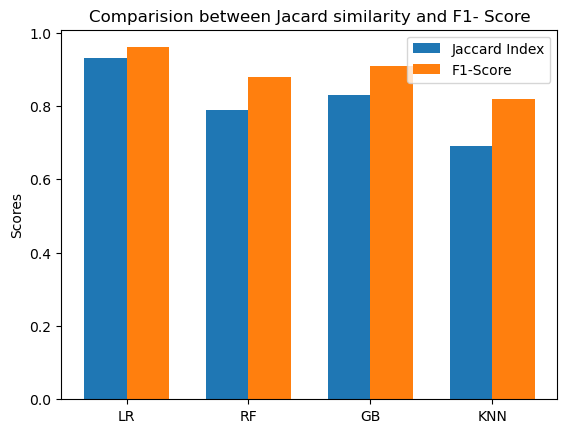

In [109]:
import matplotlib.pyplot as plot

ind = np.arange(4) 
width = 0.35       
plot.bar(ind, list_jaccard_similarity, width, label='Jaccard Index')
plot.bar(ind + width,  f1Score, width,
    label='F1-Score')

plot.ylabel('Scores')
plot.title('Comparision between Jacard similarity and F1- Score')

plot.xticks(ind + width / 2, ('LR', 'RF', 'GB', 'KNN'))
plot.legend(loc='best')
plot.show()

# Highest Jaccard Similarity = Logistic Regression

# Highest F1-score = Logistic Regression

In [113]:
X_predict = list(pipeline_lr.predict(X_test))
predicted_df = {'predicted_values': X_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(25)

,predicted_values,original_values
0,2,2
1,2,2
2,0,0
3,0,0
4,3,3
5,3,3
6,1,1
7,4,4
8,0,0
9,3,3


In [114]:
pd.DataFrame(predicted_df)['predicted_values'].value_counts()

3    111
2    107
0    105
1     45
4     32
Name: predicted_values, dtype: int64

In [115]:
pd.DataFrame(predicted_df)['original_values'].value_counts()

3    116
0    103
2    102
1     46
4     33
Name: original_values, dtype: int64